<a href="https://colab.research.google.com/github/ZAINABALBALUSHI/Mining-and-Predictive-Analytics/blob/main/ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import io
import pandas as pd

data = files.upload()


Saving test.csv to test (1).csv
Saving train.csv to train (1).csv


In [ ]:
# Load datasets
train_df = pd.read_csv(io.BytesIO(data['train.csv']))
test_df = pd.read_csv(io.BytesIO(data['test.csv']))


# Descriptive Exploration
Overview of the Dataset
The training dataset was analyzed to understand its structure and contents. Below is a summary of the initial exploration:

Columns with missing values were identified.
Summary statistics of numeric variables were computed.

In [ ]:
# Overview of the training dataset
print("Train Dataset Shape:", train_df.shape)
print("Train Dataset Info:\n", train_df.info())
print("Train Dataset Description:\n", train_df.describe())

# Display the first few rows
print(train_df.head())


Train Dataset Shape: (1460, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 

**Missing Values Analysis**
A heatmap was generated to visualize missing data. Key features like LotFrontage, Alley, and FireplaceQu showed significant missing values.

Heatmap of Missing Values:

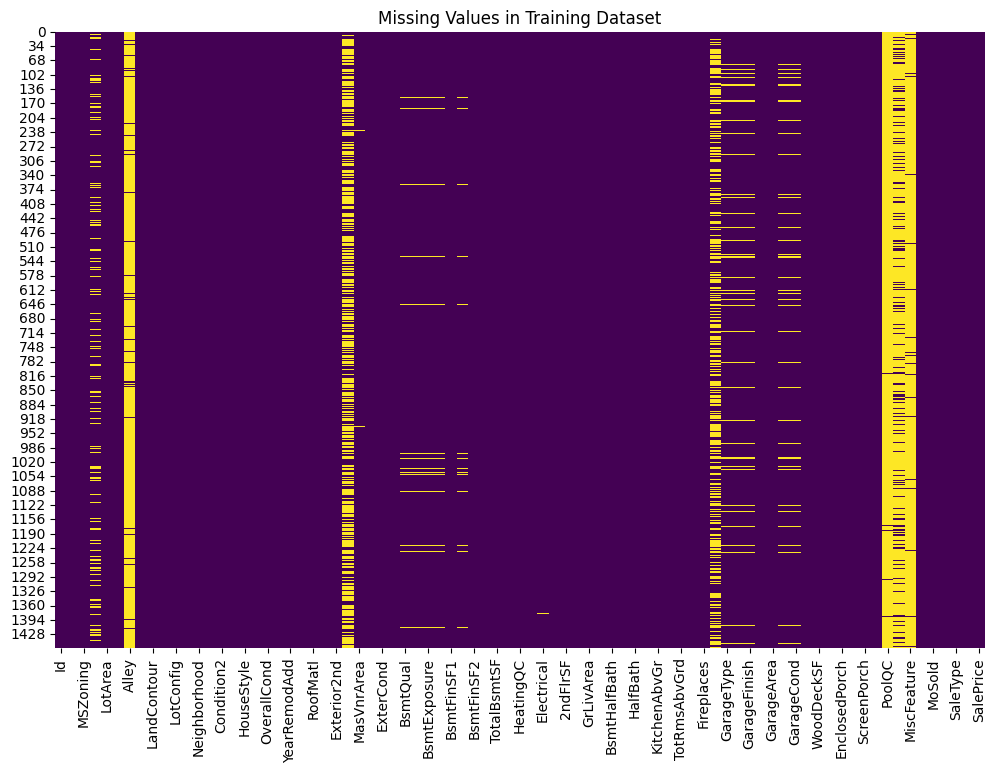

In [ ]:
# Visualize missing values
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(train_df.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values in Training Dataset")
plt.show()


Correlation Analysis
The correlation between numeric features and the target variable SalePrice was calculated. A heatmap was created to highlight significant relationships.

Heatmap of Correlation:

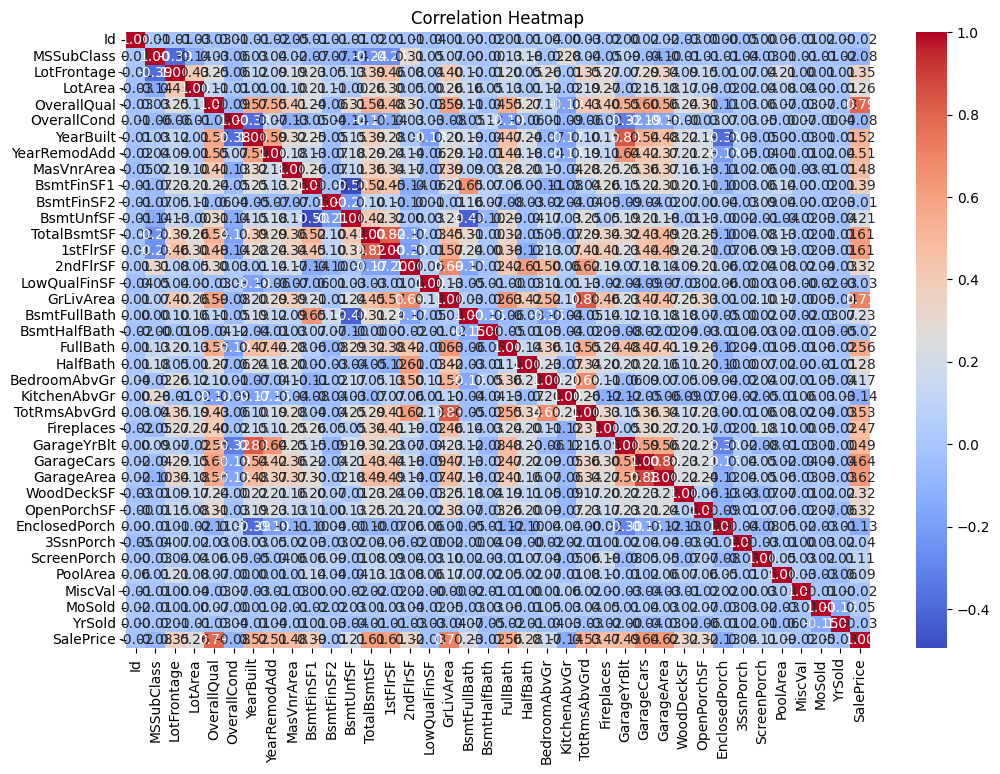

In [ ]:
# Compute correlation matrix for numeric features
numeric_cols = train_df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_cols.corr()

# Visualize the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


 Box Plot Analysis
A box plot was used to examine the relationship between OverallQual (overall material and finish quality) and SalePrice.

Box Plot:

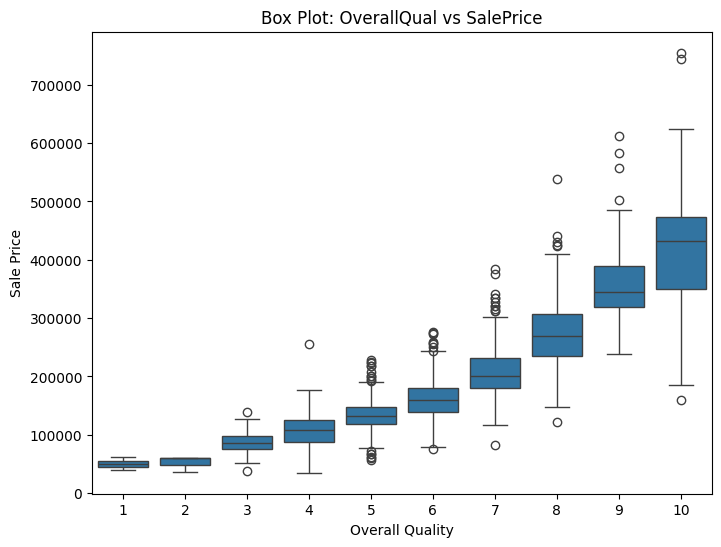

In [ ]:
# Box plot for OverallQual vs SalePrice
plt.figure(figsize=(8, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=train_df)
plt.title("Box Plot: OverallQual vs SalePrice")
plt.xlabel("Overall Quality")
plt.ylabel("Sale Price")
plt.show()


Regression Plot Analysis
A regression plot was used to explore the linear relationship between GrLivArea (above-ground living area in square feet) and SalePrice.

Regression Plot:

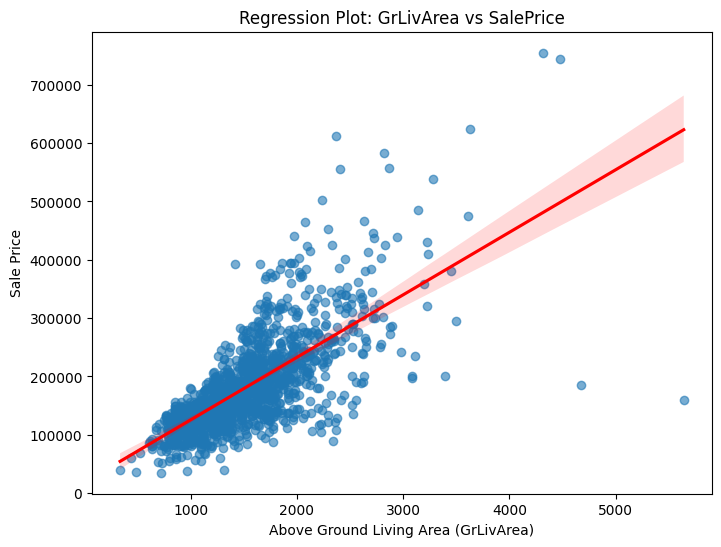

In [ ]:
# Regression plot for GrLivArea vs SalePrice
plt.figure(figsize=(8, 6))
sns.regplot(x='GrLivArea', y='SalePrice', data=train_df, scatter_kws={'alpha': 0.6}, line_kws={"color": "red"})
plt.title("Regression Plot: GrLivArea vs SalePrice")
plt.xlabel("Above Ground Living Area (GrLivArea)")
plt.ylabel("Sale Price")
plt.show()


Pearson Correlation Coefficient and P-Value
The Pearson correlation coefficient and p-value were computed for the feature GrLivArea and the target SalePrice.

Pearson Correlation:

In [ ]:
from scipy.stats import pearsonr

# Calculate Pearson correlation coefficient and p-value
feature = 'GrLivArea'
target = 'SalePrice'
pearson_corr, p_value = pearsonr(train_df[feature], train_df[target])

print(f"Pearson Correlation Coefficient ({feature} vs {target}): {pearson_corr:.4f}")
print(f"P-Value: {p_value:.4e}")


Pearson Correlation Coefficient (GrLivArea vs SalePrice): 0.7086
P-Value: 4.5180e-223


Handling Missing Data


In [34]:
# Handling missing values
numeric_cols_to_impute = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
for col in numeric_cols_to_impute:
    train_df[col] = train_df[col].fillna(train_df[col].mean())

categorical_cols_to_impute = ['Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'FireplaceQu']
for col in categorical_cols_to_impute:
    # Check if the column exists in the DataFrame before imputing
    if col in train_df.columns:
        train_df[col] = train_df[col].fillna(train_df[col].mode()[0])
    else:
        print(f"Column '{col}' not found in DataFrame. Skipping imputation.")


Column 'Alley' not found in DataFrame. Skipping imputation.
Column 'MasVnrType' not found in DataFrame. Skipping imputation.
Column 'BsmtCond' not found in DataFrame. Skipping imputation.
Column 'FireplaceQu' not found in DataFrame. Skipping imputation.


In [35]:
# Remove outliers
train_df = train_df[train_df['GrLivArea'] < 4000]


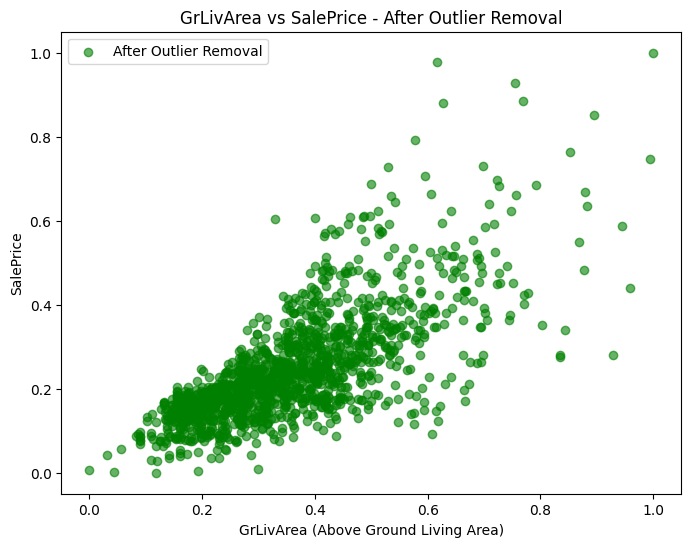

In [45]:
plt.figure(figsize=(8, 6))
# Replace 'train_df_cleaned' with 'train_df'
plt.scatter(train_df['GrLivArea'], train_df['SalePrice'], alpha=0.6, color='green', label="After Outlier Removal")
plt.xlabel("GrLivArea (Above Ground Living Area)")
plt.ylabel("SalePrice")
plt.title("GrLivArea vs SalePrice - After Outlier Removal")
plt.legend()
plt.show()

In [36]:
from sklearn.preprocessing import LabelEncoder

# Encode ordinal categorical features
ordinal_features = ['BsmtQual', 'ExterQual']
le = LabelEncoder()
for col in ordinal_features:
    train_df[col] = le.fit_transform(train_df[col])


In [37]:
# One-hot encoding for nominal categorical features
train_df = pd.get_dummies(train_df, drop_first=True)


In [41]:
from sklearn.preprocessing import MinMaxScaler

# Normalize numeric features
scaler = MinMaxScaler()
numeric_cols = train_df.select_dtypes(include=['float64', 'int64']).columns
train_df[numeric_cols] = scaler.fit_transform(train_df[numeric_cols])


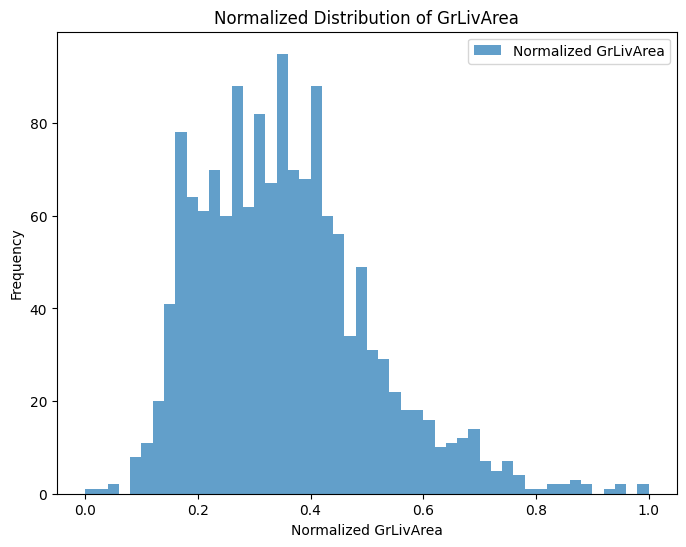

In [42]:
plt.figure(figsize=(8, 6))
plt.hist(train_df['GrLivArea'], bins=50, alpha=0.7, label="Normalized GrLivArea")
plt.xlabel("Normalized GrLivArea")
plt.ylabel("Frequency")
plt.title("Normalized Distribution of GrLivArea")
plt.legend()
plt.show()

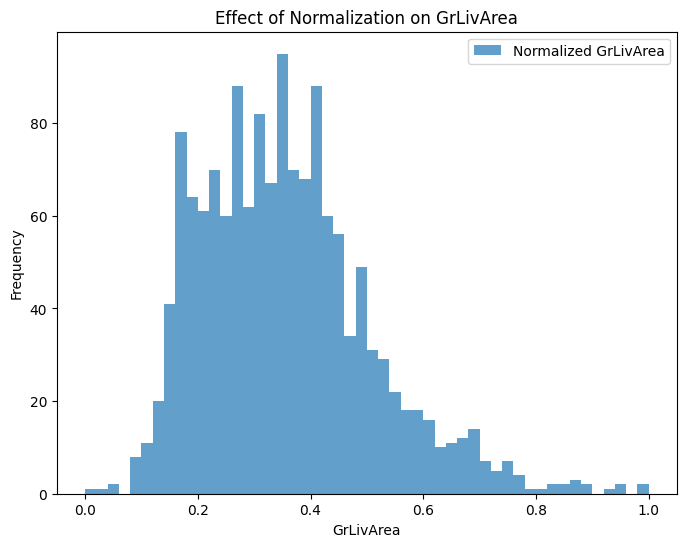

In [39]:
# Plot normalized features
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(train_df['GrLivArea'], bins=50, alpha=0.7, label="Normalized GrLivArea")
plt.xlabel("GrLivArea")
plt.ylabel("Frequency")
plt.legend()
plt.title("Effect of Normalization on GrLivArea")
plt.show()


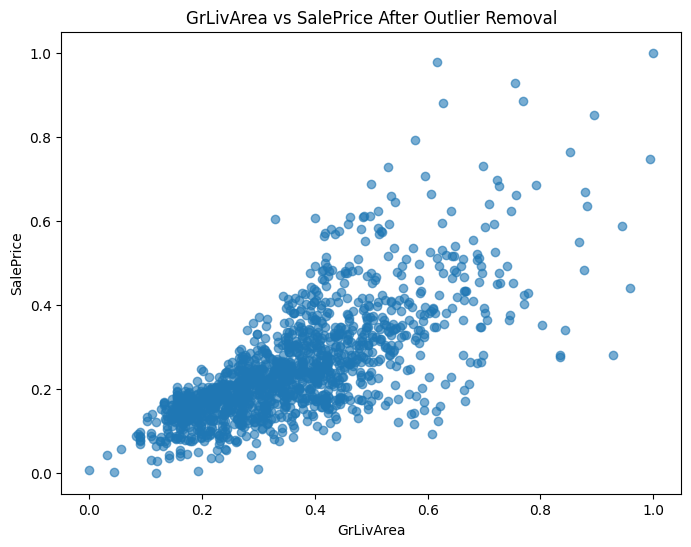

In [40]:
# Scatter plot to visualize outlier removal
plt.figure(figsize=(8, 6))
plt.scatter(train_df['GrLivArea'], train_df['SalePrice'], alpha=0.6)
plt.title("GrLivArea vs SalePrice After Outlier Removal")
plt.xlabel("GrLivArea")
plt.ylabel("SalePrice")
plt.show()
